## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import matplotlib.ticker as mticker
import re

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_combine_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
mouse_study_combine_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Check the number of mice.
mouse_metadata['Mouse ID'].count()


249

In [3]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_study_dupcnt_df = mouse_study_combine_df[mouse_study_combine_df.duplicated()]

mouse_study_dupcnt_df['Mouse ID']

909    g989
Name: Mouse ID, dtype: object

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
# Combine the data into a single dataset
#mouse_study_combine_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
mouse_study_combine_nodup_df = mouse_study_combine_df
mouse_study_combine_nodup_df.drop(mouse_study_combine_nodup_df[mouse_study_combine_nodup_df['Mouse ID']=='g989'].index, inplace=True)

mouse_study_combine_nodup_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Check the number of mice in the clean DataFrame.
mouse_study_combine_nodup_df['Mouse ID'].nunique()


248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mouse_study_groupby_Reg_df = mouse_study_combine_nodup_df.groupby(['Drug Regimen'])
mouse_study_groupby_Reg_mean = mouse_study_groupby_Reg_df['Tumor Volume (mm3)'].mean()
mouse_study_groupby_Reg_median = mouse_study_groupby_Reg_df['Tumor Volume (mm3)'].median()
mouse_study_groupby_Reg_variance = mouse_study_groupby_Reg_df['Tumor Volume (mm3)'].var()
mouse_study_groupby_Reg_std = mouse_study_groupby_Reg_df['Tumor Volume (mm3)'].std()
mouse_study_groupby_Reg_sem = mouse_study_groupby_Reg_df['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
mouse_study_groupby_sum1_df = pd.merge(mouse_study_groupby_Reg_mean, mouse_study_groupby_Reg_median, on='Drug Regimen', how='outer')
mouse_study_groupby_sum1_df.rename(columns={'Tumor Volume (mm3)_x': 'Mean Tumor Volume', 'Tumor Volume (mm3)_y': 'Median Tumor Volume'}, inplace=True)
mouse_study_groupby_sum1_df = pd.merge(mouse_study_groupby_sum1_df, mouse_study_groupby_Reg_variance, on='Drug Regimen', how='outer')
mouse_study_groupby_sum1_df.rename(columns={'Tumor Volume (mm3)': 'Variance Tumor Volume'}, inplace=True)
mouse_study_groupby_sum1_df = pd.merge(mouse_study_groupby_sum1_df, mouse_study_groupby_Reg_std, on='Drug Regimen', how='outer')
mouse_study_groupby_sum1_df.rename(columns={'Tumor Volume (mm3)': 'Std Dev Tumor Volume'}, inplace=True)
mouse_study_groupby_sum1_df = pd.merge(mouse_study_groupby_sum1_df, mouse_study_groupby_Reg_sem, on='Drug Regimen', how='outer')
mouse_study_groupby_sum1_df.rename(columns={'Tumor Volume (mm3)': 'Std Error Tumor Volume'}, inplace=True)
mouse_study_groupby_sum1_df


,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Std Dev Tumor Volume,Std Error Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
mouse_study_groupby_sum2_df = mouse_study_groupby_Reg_df.agg({'Tumor Volume (mm3)' : ['mean', 'median', 'var', 'std', 'sem']})

mouse_study_groupby_sum2_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

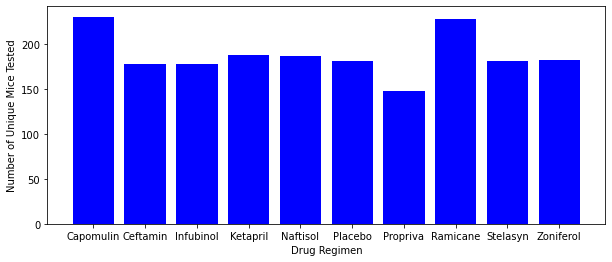

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

# Use the 'Drug Regimen' group by above to get a count of the unique mice for each drug regimen. 
#mouse_study_groupby_Reg_df.drop_duplicates()

mouse_study_groupby_Reg_MousCnt_df = mouse_study_groupby_Reg_df['Mouse ID'].count()

mouse_study_DrugReg_list = mouse_study_groupby_Reg_MousCnt_df.index

# Create a bar plot of "Number of Unique Mice Tested" vs "Drug Regimen"
plt.figure(figsize=(10,4))
plt.bar(mouse_study_DrugReg_list, mouse_study_groupby_Reg_MousCnt_df, color='b', align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice Tested")
plt.show()


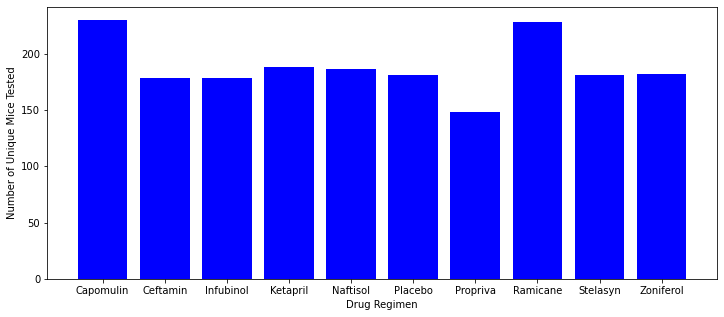

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

plt.figure(figsize=(12,5))
plt.bar(mouse_study_DrugReg_list, mouse_study_groupby_Reg_MousCnt_df, color='b', align='center');
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice Tested")

plt.show()

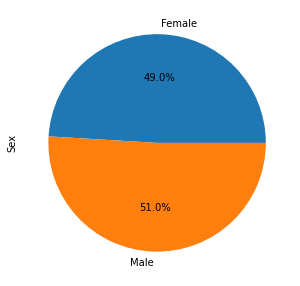

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Groupby sex
mouse_study_groupby_sex_df = mouse_study_combine_nodup_df.groupby(['Sex'])

# Get the count for each sex
mouse_study_groupby_sex_MousCnt_list = mouse_study_groupby_sex_df['Sex'].count()

# Reindex it
mouse_study_groupby_sex_list = mouse_study_groupby_sex_MousCnt_list.index

# Create the plot
plot = mouse_study_groupby_sex_MousCnt_list.plot.pie(y='Count', figsize=(5, 5), autopct = '%1.1f%%')
mouse_study_groupby_sex_list

plt.show()

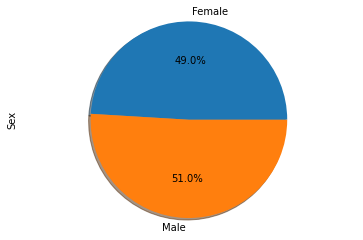

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


plt.pie(mouse_study_groupby_sex_MousCnt_list, labels=mouse_study_groupby_sex_list,
        shadow=True, autopct = '%1.1f%%')

# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Drug_Regimen_four_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = mouse_study_combine_df.groupby(["Mouse ID"])['Timepoint'].max()
max_timepoint = max_timepoint.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mouse_study_combine_merged_df = max_timepoint.merge(mouse_study_combine_df,on=['Mouse ID','Timepoint'],how="left")

mouse_study_combine_merg_list_df = mouse_study_combine_merged_df[mouse_study_combine_merged_df['Drug Regimen'].isin(Drug_Regimen_four_list)]

mouse_study_combine_merg_list_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
238,y769,45,Ceftamin,Female,6,27,68.594745,4
239,y793,45,Capomulin,Male,17,17,31.896238,2
240,y865,45,Ceftamin,Male,23,26,64.729837,3
244,z578,45,Ramicane,Male,11,16,30.638696,0


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
Drug_Regimen_four_list  = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in Drug_Regimen_four_list:
   
    # Locate the rows which contain mice on each drug and get the tumor volumes
    temp_filtered_drug_df  = mouse_study_combine_merg_list_df.loc[mouse_study_combine_merg_list_df["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset
    tumor_vol_list.append(temp_filtered_drug_df)
    
    # Determine outliers using upper and lower bounds
    quartiles = temp_filtered_drug_df .quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = temp_filtered_drug_df .loc[(temp_filtered_drug_df  < lower_bound) | (temp_filtered_drug_df  > upper_bound)]
    
    # Print the outliers for each drug
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


<ipython-input-15-8011248ad4b8>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(Drug_Regimen_four_list)


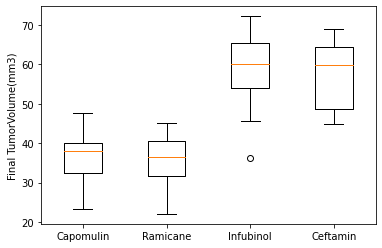

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig, ax = plt.subplots()

ax.set_xticklabels(Drug_Regimen_four_list)
ax.set_ylabel('Final TumorVolume(mm3)')
ax.boxplot(tumor_vol_list)
plt.show()

## Line and Scatter Plots

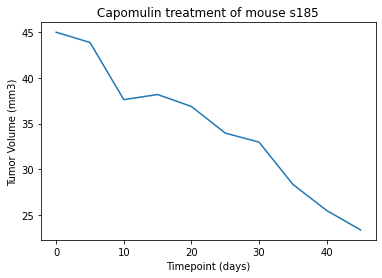

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Create a dataframe for just Capomulin
Capomulin_df = mouse_study_combine_df[mouse_study_combine_df['Drug Regimen'].str.contains('Capomulin')]

# Create a dataframe for just mouse s185
tv_vs_mouseID_Capomulin_df = Capomulin_df[Capomulin_df['Mouse ID'].str.contains('s185')]

# Create a line plot
plt.title("Capomulin treatment of mouse s185")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.plot(tv_vs_mouseID_Capomulin_df['Timepoint'], tv_vs_mouseID_Capomulin_df['Tumor Volume (mm3)'])

plt.show()

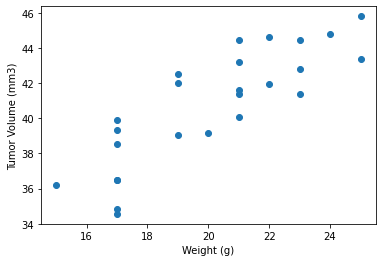

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#Create a groupby dataframe by 'Mouse ID'
Capomulin_groupby_MouseID_df = Capomulin_df.groupby(['Mouse ID'])

# Create a list for the mean of 'Tumor Volume (mm3)'
Capomulin_groupby_MouseID_tvmean_df = Capomulin_groupby_MouseID_df['Tumor Volume (mm3)'].mean()

# Create a list for the mean of 'Weight (g)'
Capomulin_groupby_MouseID_wtmean_df = Capomulin_groupby_MouseID_df['Weight (g)'].mean()

# Create a scatter plot
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

plt.scatter(Capomulin_groupby_MouseID_wtmean_df, Capomulin_groupby_MouseID_tvmean_df,marker='o')


plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


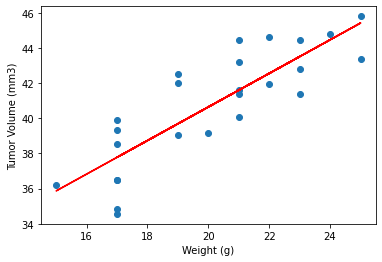

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Create a scatter plot
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.scatter(Capomulin_groupby_MouseID_wtmean_df, Capomulin_groupby_MouseID_tvmean_df,marker='o')

# Get the regression data
(slope, intercept, rvalue, pvalue, stderr) = linregress(Capomulin_groupby_MouseID_wtmean_df, Capomulin_groupby_MouseID_tvmean_df)

# Print the correlation coefficient
print(f"The correlation between mouse weight and the average tumor volume is {round(rvalue, 2)}")

# Create the line for the regression data and plot them
tv_vs_wt_fit = slope * Capomulin_groupby_MouseID_wtmean_df + intercept
plt.plot(Capomulin_groupby_MouseID_wtmean_df,tv_vs_wt_fit,'-', color='r');